# Importamos librerías a utilizar

In [1]:
#Para crear y análizar redes
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt
#Para leer desde un archivo
import pandas as pd 
import numpy as np
#Para generar errores aleatorios
from random import randint, uniform,random

# Funciones para imprimir la informacion de la red
## ACTIVIDAD 1: Información general de la red
Coloque la función imprime_informacion que se creo en anteriores prácticas. Esta función imprime la información de la red. Recibe la red G e imprime el numero de nodos, numero de enlaces, diámetro, y densidad de la red G.

In [2]:
def imprime_informacion(G):
    print("Información de la red:")
    print(f"- num nodos = {len(nx.nodes(G))}")
    print(f"- num enlaces = {len(nx.edges(G))}")
    print(f"- diametro = {nx.diameter(G)}")
    print(f"- densidad = {nx.density(G)}")
    print(nx.info(G))

## ACTVIDAD 2: Distribución de grados
Coloque la función grafica_distribucion_grados que se creo en anteriores prácticas. Esta funcion grafica la distribucion de grados y en este caso no devuelve nada. Recibe la red G y la variable nombre_dg. Cálcula, imprime y gráfica la distribución de grados. La gráfica la guarda en un archivo png con nombre almacenado en la variable nombre_dg. Devuleve la distribución de grados

In [90]:
def grafica_distribucion_grados(G, nombre_dg, nombre):
    dist_grados = nx.degree_histogram(G)
    plt.plot(dist_grados, label = nombre)
    plt.legend()
    plt.xlabel("grado")
    plt.ylabel("#nodos")
    plt.title("Distribución de Grados")
    plt.savefig(nombre_dg)
    plt.show()
    #return dist_grados

## ACTIVIDAD 3: Mapa de calor por métrica de centralidad (grado, intermediación, cercanía, PageRank)
Modifique la función mapa_calor_grado que se creo en anteriores prácticas, ahora se llamará mapa_calor. La función recibe como parámetros a la red G, la variable nombre_red y la cadena metrica.La función debe crear el mapa de calor de una red por una metrica de centralidad indicada (grado, intermediacion, cercania o PageRank).  Grafica el mapa de calor y lo guarda en un archivo png con el nombre almacenado en nombre_red.

In [45]:
def mapa_calor(G, nombre_mcalor, tipo):  
    
    if tipo == "grado":
        mapa = {node:nx.degree(G, node) for node in G.nodes()}                
    elif tipo == "cercania":        
        mapa = {node:nx.closeness_centrality(G, node) for node in G.nodes()}                        
    elif tipo == "intermediacion":
        mapa = nx.betweenness_centrality(G)        
    elif tipo == "PageRank":
        mapa = nx.pagerank(G)              
    #valores máximo y mínimos de grado
    max_degree = max(mapa.values())
    min_degree = min(mapa.values())        
    #el grado nodal nos da el color de nodo, el cual se mapea con el mapa de color
    colores_nodos = list(mapa.values())
    #ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html
    mapa_color = plt.get_cmap('bwr')
    #dibujamos la red
    #plt.figure(1,figsize=(15,15))
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=False)
    #dibujamos la barra de color
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    cbar.set_label(tipo)
    plt.savefig(nombre_mcalor + ".png")
    plt.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()

# Funciones para análizar la red sometida a fallos o ataques

## ACTIVIDAD 4: Número de componentes conectados

Coloque la función num_componentes_conectados que se creo en anteriores practica. Esta función recibe como parámetro la red G y devuelve el número de componentes conectados de G. Utilizar los métodos ya diseñados en python para el calculo de componentes conectados de una red, ver https://networkx.org/documentation/stable/reference/algorithms/component.html. 

In [5]:
def num_componentes_conectados(G):
    num_cc = nx.number_connected_components(G)
    return num_cc

## ACTIVIDAD 5: Proporción del componente gigante

Coloque la función prop_componente_gigante que se creo en anteriores practicas. Esta función recibe como parámetro la red G y devuelve al proporción de nodos que tiene el componente gigante con respecto a los nodos que tiene G, este valor debe ser un número entre 0 y 1. 

In [23]:
def prop_componente_gigante(G):
    pcg = len(max(nx.connected_components(G), key=len))/len(nx.nodes(G))
    return pcg

## ACTIVIDAD 6: Función para graficar 3 funciones en una misma figura
Comente lo que sucede en cada línea de código de la función

Funcion que grafica 3 funciones en una misma figura. 
Parámetros:

1) titulo : texto

2) f1_valores: lista de numeros

3) f2_valores: lista de numeros

4) f3_valores: lista de numeros

5) f1_leyenda: texto

6) f2_leyenda: texto

7) f3_leyenda: texto

8) ejex_etiqueta: texto

9) ejey_etiqueta: texto

In [7]:
def grafica_funciones(titulo,f1_valores, f2_valores,f3_valores,f1_leyenda, f2_leyenda ,f3_leyenda ,ejex_etiqueta, ejey_etiqueta,nombre):
    plt.title(titulo)
    f1_x = [x / (len(f1_valores)-1) for x in range(len(f1_valores))]
    f2_x = [x / (len(f2_valores)-1) for x in range(len(f2_valores))]
    f3_x = [x / (len(f3_valores)-1) for x in range(len(f3_valores))]
    plt.plot(f1_x, f1_valores, label=f1_leyenda)  
    plt.plot(f2_x, f2_valores, label=f2_leyenda)
    plt.plot(f3_x, f3_valores, label=f3_leyenda)
    plt.xlabel(ejex_etiqueta)
    plt.ylabel(ejey_etiqueta)
    plt.legend()
    plt.savefig(nombre)

# Funciones para simular de Errores

## ACTIVIDAD 7: Función para simular un error
Coloque la función error(G) que se creo en la anterior practica. Esta función simula un error en la red G. La función recibe una red G, elimina un nodo i aleatoreamente. La función devuelve la nueva red G (sin el nodo i)

In [8]:
def error(G):
    list_nodos = []
    #se obtienen una lista de los nodos de la red G
    lista_n = nx.nodes(G)
    #Se almacena una copia en otra lista para manipularlos
    for i in lista_n:
        list_nodos.append(i)
    #Se obtiene el número de nodos que tiene la red  
    num_nodos = len(list_nodos)
    #Se elige un número al azar entre 0 y el núm maximo de nodos
    x = randint(0,(num_nodos-1))
    #Se elimina el nodo que se escogio al azar
    G.remove_node(list_nodos[x])
    return G

## ACTIVIDAD 8: Función para simular varios errores secuenciales
Coloque la función errores_secuenciales(G,num_errores) que se creo en la anterior practica. La función recibe una red G y un entero "num_errores", el cuál indica la cantidad de errores que ocurrirán en la red. 

La función llama secuencialmente "num_errores" veces a la función error(G). Después de cada error almacena en un la lista "num_cc_lista" el número de componentes conectados de G y en otra lista la proporción del componente gigante "prop_cg_lista". Devuleve la tupla (num_cc_lista, prop_cg_lista). Debe utilizar a las funciones creadas en las actividades 4 y 5

In [48]:
def errores_secuenciales(G,num_errores):
    num_cc_lista = []
    prop_cg_lista = []
    n_original = len(nx.nodes(G))
    for i in range(0,num_errores):
        #Se manda a llamar a la función error para que elimine los nodo y devuelva la red con los
        #nodos eliminados
        G = error(G)
        #Se van almacenando el num de componentes conectados y la proporción del componente gigante de la red
        num_cc_lista.append(num_componentes_conectados(G))
        prop_cg_lista.append(prop_componente_gigante(G))
    return (num_cc_lista, prop_cg_lista)

# Funciones para seleccionar nodos importante de acuerdo a métricas de centralidad

## ACTIVIDAD 9: Función para obtener el nodo de grado más alto de una red
Coloque la función nodo_mayor_grado(G) que fue creada en la anterior práctica. Esta función recibe la red G y devuelve el nodo de mayor grado. 

In [10]:
def nodo_max_grado(G):
    list_n = []
    #se obtienen una lista de los nodos de la red G
    lista_nodos = nx.nodes(G)
    #Se almacena una copia en otra lista para manipularlos
    list_n = list(lista_nodos)
    #Se toma el primer elemento de la mista como el nodo maximo, solo como referencia
    big = list_n[0]
    n = nx.degree(G,list_n[0])
    #Se recorren todos los nodos en busqueda del nodo con mayor grado nodal
    for i in lista_nodos:
        #Codición para analizar si el grado nodal actual es mayor al almacenado anteriormente en 'n'
        if (nx.degree(G,i)) > n:
            #Cuando se encuentra ese nodo se almacena el nombre y el grado nodal
            n = nx.degree(G,i)
            big = i
    return big

## ACTIVIDAD 10: Función para obtener el nodo de intermediación más alta de una red
Complete la función nodo_mayor_intermediacion(G) que recibe la red G y devuelve el nodo de mayor intermediacion. Utilice la función de NetworkX para calcular la intermediación https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html

In [11]:
def nodo_mayor_intermediacion(G):
    lista_intermediacion = nx.betweenness_centrality(G)
    nodo_max_int = max(lista_intermediacion, key=lambda key: lista_intermediacion[key])
    return nodo_max_int

## ACTIVIDAD 11: Función para obtener el nodo de cercanía más alta de una red
Complete la función nodo_mayor_cercania(G) que recibe la red G y devuelve el nodo de mayor cercania. Utilice la función de NetworkX para calcular la cercanía https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html

In [12]:
def nodo_mayor_cercania(G):
    lista_cercania = nx.closeness_centrality(G)
    nodo_max_cer = max(lista_cercania, key=lambda key: lista_cercania[key])
    return nodo_max_cer

## ACTIVIDAD 12: Función para obtener el nodo con PageRank más alto de una red
Complete la función nodo_mayor_PageRank(G) que recibe la red G y devuelve el nodo de mayor PageRank. utilice la función de NetworkX para calcular el PageRank https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank

In [13]:
def nodo_mayor_PageRank(G):
    pr = nx.pagerank(G)
    nodo_max_pr = max(pr, key=lambda key: pr[key])
    return nodo_max_pr

# Funciones para simular de Ataques

## ACTIVIDAD 13: Función para simular un ataque con base en alguna métrica de centralidad (grado, intermediación, cercanía, PageRank)
Modifique la función ataque que se creo en la anterior practica. Ahora la función se llamará ataque(G, tipo) y debe simular un ataque en la red G, por alguna métrica de centralidad. La función recibe una red G y una cadena tipo que puede ser "grado", "cercania", "intermediacion", "PageRank". La función elimina el nodo i con más valor en la metrica indicada en la cadena tipo. Devuelve la nueva red G sin el nodo i. Debe utilizar las funciones de la actividad 9 a la 12.

In [14]:
def ataque(G, tipo):
    if tipo == "grado":
        #Se manda a llamar a la función con grado nodal mayor
        n = nodo_max_grado(G)
        #Cuando se obtiene ese nodo se elimina
        G.remove_node(n)
    if tipo == "cercania":
        #Se manda a llamar a la función para obtener el nodo con mayor cercania
        n = nodo_mayor_cercania(G)
        #Cuando se obtiene ese nodo se elimina
        G.remove_node(n)
    if tipo == "intermediacion":
        #Se manda a llamar a la función para obtener el nodo con mayor intermediación
        n = nodo_mayor_intermediacion(G)
        #Cuando se obtiene ese nodo se elimina
        G.remove_node(n)    
    if tipo == "PageRank":
        #Se manda a llamar a la función para obtener el nodo con mayor PageRank
        n = nodo_mayor_PageRank(G)
        #Cuando se obtiene ese nodo se elimina
        G.remove_node(n)   
    return G

## ACTIVIDAD 14: Función para simular varios ataques secuenciales
Modifique la función ataques_secuenciales que se creo en la anterior práctica. Ahora la función recibe una red G, un entero "num_ataques" que indica la cantidad de ataques que ocurrirán en la red y una cadena "tipo" que puede ser "grado", "cercania", "intermediacion", "pageRank". La función secuencialmente llama "num_ataques" veces a la función ataque(G, tipo). Después de cada ataque almacena en una lista "num_cc_lista" el número de componentes conectados de G y en otra lista "prop_cg_lista" la proporción del componente gigante. Devuleve la tupla (num_cc_lista, prop_cg_lista).

In [47]:
def ataques_secuenciales(G,num_ataques, tipo):
    num_cc_lista = []
    prop_cg_lista = []
    n_original = len(nx.nodes(G))
    #Ciclo para ir eliminando los nodos con mayor grado nodal
    for i in range(num_ataques):
        G = ataque(G, tipo)
        #Se van almacenando el num de componentes conectados y la proporción del componente gigante de la red
        num_cc_lista.append(num_componentes_conectados(G))
        prop_cg_lista.append(prop_componente_gigante(G))
    return (num_cc_lista, prop_cg_lista)

# Análisis de redes de páginas web, redes sociales, redes de computadoras y redes de infraestructura

## ACTIVIDAD 15: Importamos las 5 redes definidas en los archivos de la carpeta redes
La siguiente función importa una red a partir de un archivo que contiene su lista de enlaces y en donde los datos están separados por tabulador. importe las 4 redes restantes

In [16]:
net_web = nx.read_edgelist(path="redes/web-edu.mtx", delimiter="\t")

In [17]:
coautorias = nx.read_edgelist(path="redes/ca-netscience.mtx", delimiter="\t")

In [18]:
re_tweets = nx.read_edgelist(path="redes/rt-retweet.mtx", delimiter="\t")

In [19]:
routers = nx.read_edgelist(path="redes/tech-routers-rf.mtx", delimiter="\t")

In [20]:
metroCDMX = nx.read_edgelist(path="redes/metroCDMX.csv", delimiter=";")

## ACTIVIDAD 16: Imprime la información de las redes importadas
Llame a la función imprime_información (actividad 1) para imprimir la información de la 5 redes importadas

In [21]:
imprime_informacion(net_web)

Información de la red:
- num nodos = 3031
- num enlaces = 6474
- diametro = 11
- densidad = 0.0014098539514129573
Name: 
Type: Graph
Number of nodes: 3031
Number of edges: 6474
Average degree:   4.2719


In [24]:
imprime_informacion(coautorias)

Información de la red:
- num nodos = 379
- num enlaces = 914
- diametro = 17
- densidad = 0.012759838617358406
Name: 
Type: Graph
Number of nodes: 379
Number of edges: 914
Average degree:   4.8232


In [25]:
imprime_informacion(re_tweets)

Información de la red:
- num nodos = 96
- num enlaces = 117
- diametro = 10
- densidad = 0.025657894736842105
Name: 
Type: Graph
Number of nodes: 96
Number of edges: 117
Average degree:   2.4375


In [26]:
imprime_informacion(routers)

Información de la red:
- num nodos = 2113
- num enlaces = 6632
- diametro = 12
- densidad = 0.002972221027119276
Name: 
Type: Graph
Number of nodes: 2113
Number of edges: 6632
Average degree:   6.2773


In [27]:
imprime_informacion(metroCDMX)

Información de la red:
- num nodos = 147
- num enlaces = 163
- diametro = 29
- densidad = 0.015189637498835151
Name: 
Type: Graph
Number of nodes: 147
Number of edges: 163
Average degree:   2.2177


## ACTIVIDAD 17: Distribución de grados
Llama a la función para graficar las distribucion de grados (actividad 2) de las redes creadas y guarda las imagenes obtenidas. Cada función llamela en una celda separada de código para que así pueda visualizar todas las figuras

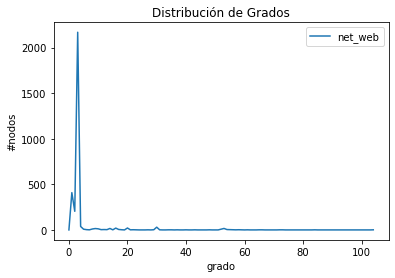

In [91]:
grafica_distribucion_grados(net_web,"dis_grado_net_web","net_web")

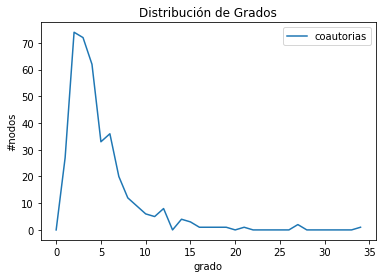

In [92]:
grafica_distribucion_grados(coautorias,"dis_grado_coautorias","coautorias")

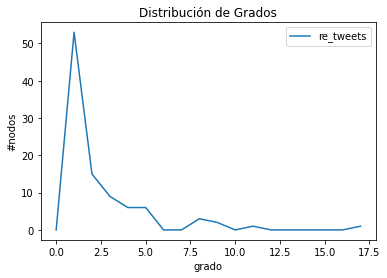

In [93]:
grafica_distribucion_grados(re_tweets,"dis_grado_re_tweets","re_tweets")

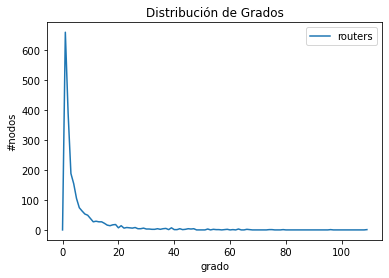

In [94]:
grafica_distribucion_grados(routers,"dis_grado_routers","routers")

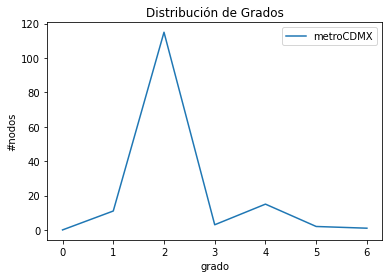

In [95]:
grafica_distribucion_grados(metroCDMX,"dis_grado_metroCDMX","metroCDMX")

## ACTIVIDAD 18: Mapas de calor por grado nodal
Llama a la función para graficar los mapas de calor (actividad 3) por grado nodal de las redes creadas y guarde las imágenes obtenidas. Cada función llamela en una celda separada de código para que así pueda visualizar todas figuras

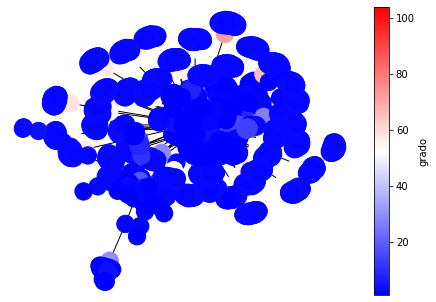

<Figure size 432x288 with 0 Axes>

In [31]:
mapa_calor(net_web,"mapa_cgrado_net_web","grado")

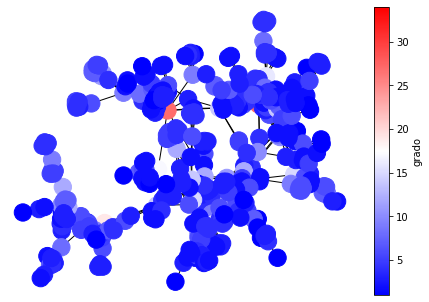

<Figure size 432x288 with 0 Axes>

In [32]:
mapa_calor(coautorias,"mapa_cgrado_coautorias","grado")

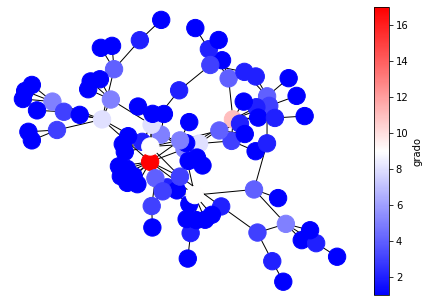

<Figure size 432x288 with 0 Axes>

In [33]:
mapa_calor(re_tweets,"mapa_cgrado_re_tweets","grado")

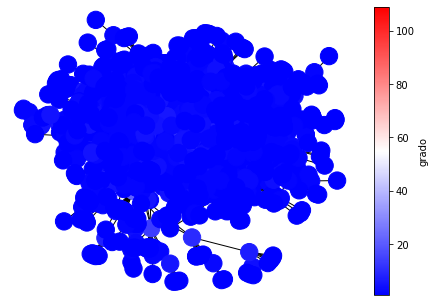

<Figure size 432x288 with 0 Axes>

In [34]:
mapa_calor(routers,"mapa_cgrado_routers","grado")

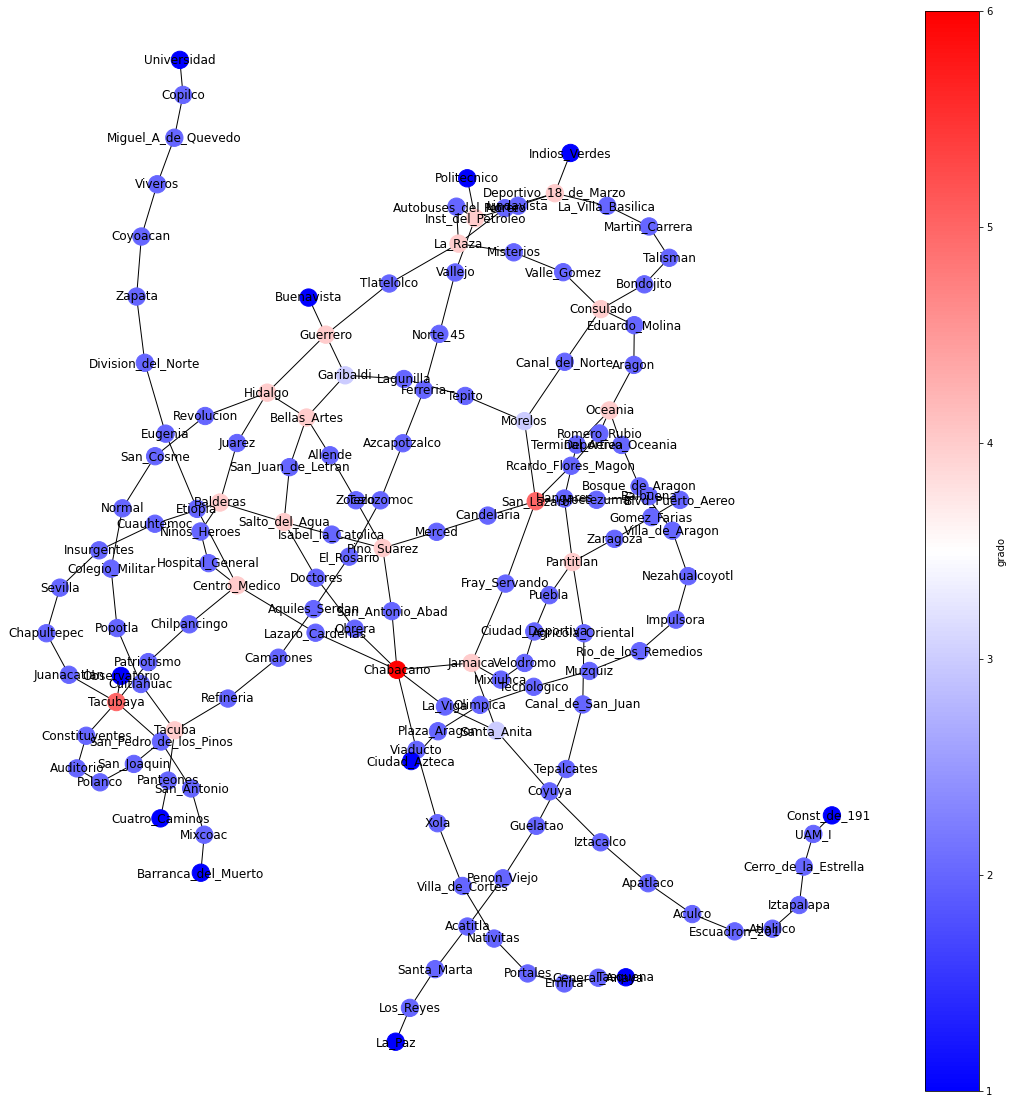

<Figure size 432x288 with 0 Axes>

In [41]:
mapa_calor(metroCDMX,"mapa_cgrado_metroCDMX","grado")

## ACTIVIDAD 19: Mapas de calor por intermediación
Llama a la función para graficar los mapas de calor (actividad 3) por intermediación de las redes creadas y guarde las imágenes obtenidas. Cada función llamela en una celda separada de código para que así pueda visualizar todas las figuras

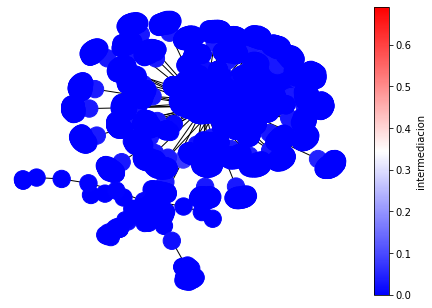

<Figure size 432x288 with 0 Axes>

In [36]:
mapa_calor(net_web,"mapa_cinterm_net_web","intermediacion")

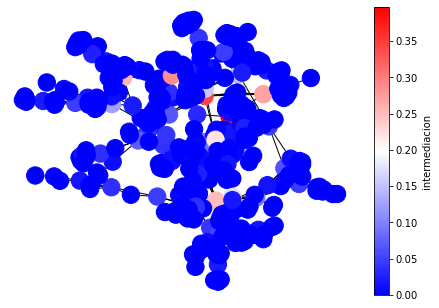

<Figure size 432x288 with 0 Axes>

In [37]:
mapa_calor(coautorias,"mapa_cinterm_coauorias","intermediacion")

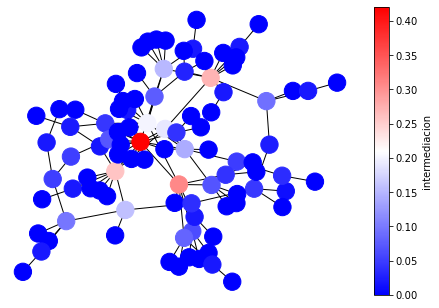

<Figure size 432x288 with 0 Axes>

In [38]:
mapa_calor(re_tweets,"mapa_cinterm_re_tweets","intermediacion")

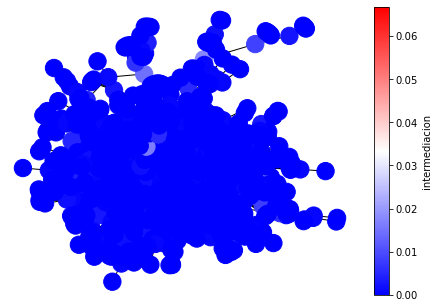

<Figure size 432x288 with 0 Axes>

In [39]:
mapa_calor(routers,"mapa_cinterm_routers","intermediacion")

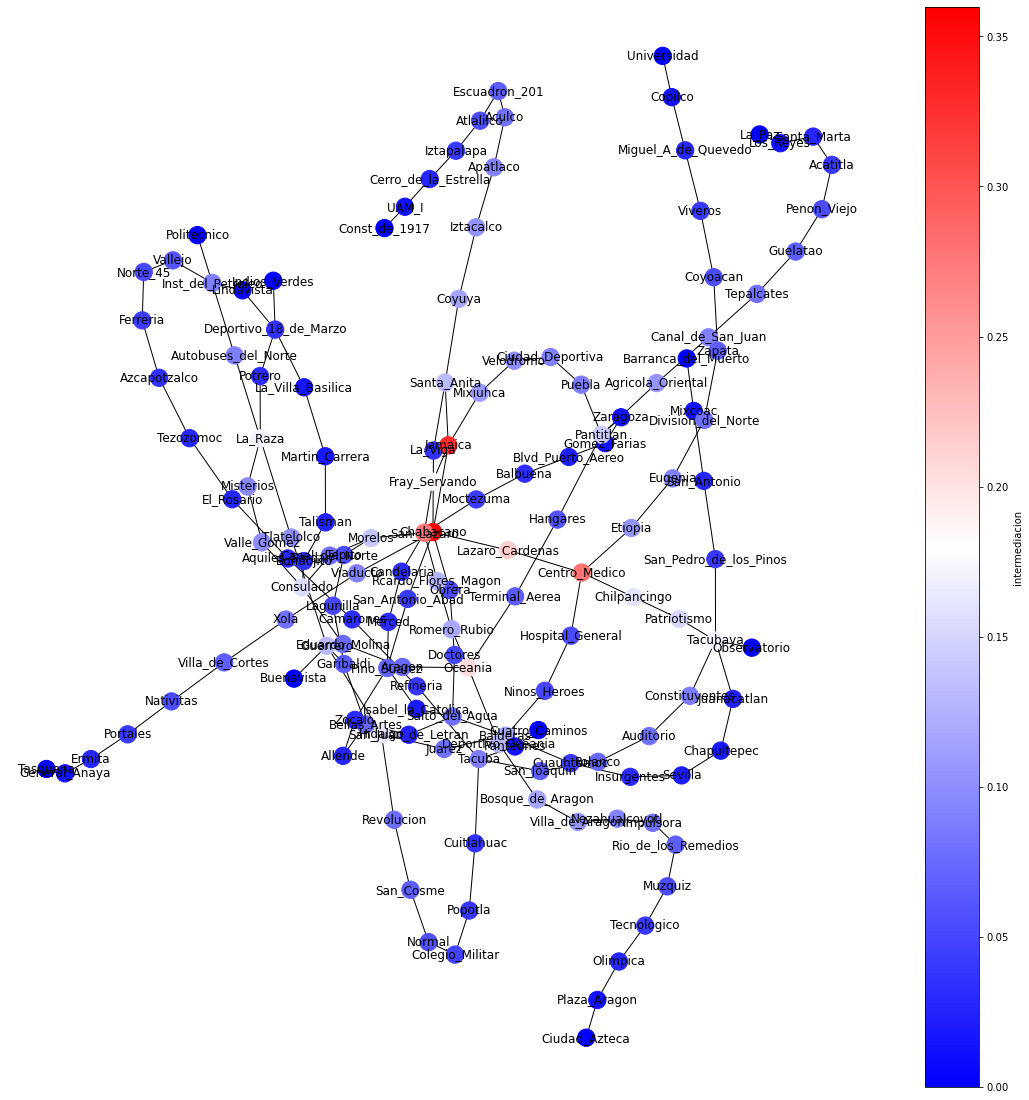

<Figure size 432x288 with 0 Axes>

In [42]:
mapa_calor(metroCDMX,"mapa_cinterm_metroCDMX","intermediacion")

## ACTIVIDAD 20: Mapas de calor por cercanía
Llama a la función para graficar los mapas de calor (actividad 3) por cercanía de las redes creadas y guarde las imágenes obtenidas. Cada función llamela en una celda separada de código para que así pueda visualizar todas las figuras

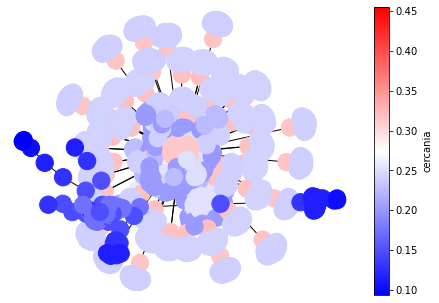

<Figure size 432x288 with 0 Axes>

In [41]:
mapa_calor(net_web,"mapa_ccerca_net_web","cercania")

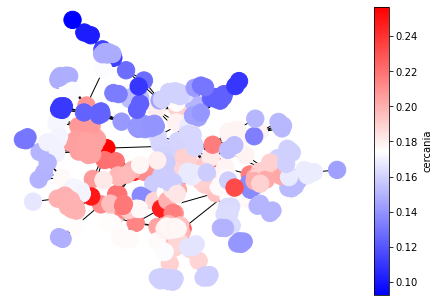

<Figure size 432x288 with 0 Axes>

In [42]:
mapa_calor(coautorias,"mapa_ccerca_coautorias","cercania")

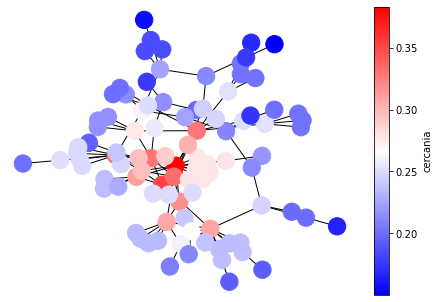

<Figure size 432x288 with 0 Axes>

In [43]:
mapa_calor(re_tweets,"mapa_ccerca_re_tweets","cercania")

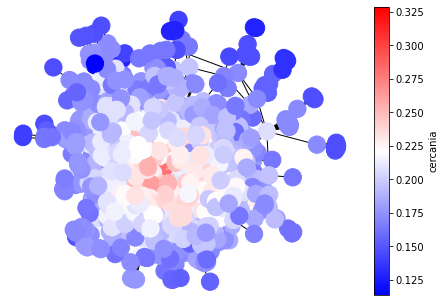

<Figure size 432x288 with 0 Axes>

In [44]:
mapa_calor(routers,"mapa_ccerca_routers","cercania")

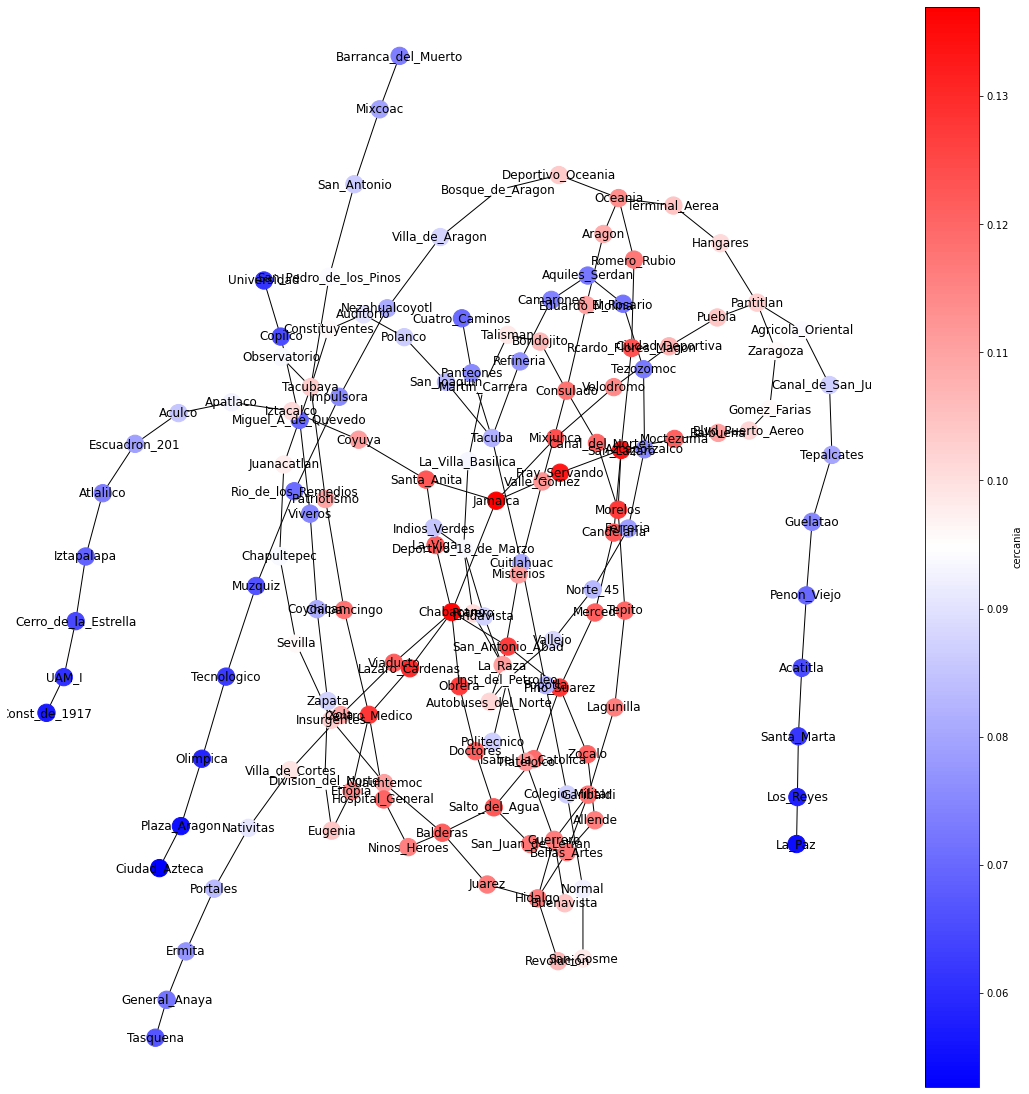

<Figure size 432x288 with 0 Axes>

In [43]:
mapa_calor(metroCDMX,"mapa_ccerca_metroCDMX","cercania")

## ACTIVIDAD 21: Mapas de calor por PageRank
Llama a la función para graficar los mapas de calor (actividad 3) por PageRank de las redes creadas y guarde las imágenes obtenidas. Cada función llamela en una celda separada de código para que así pueda visualizar todas las figuras

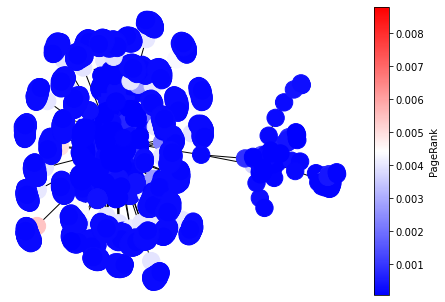

<Figure size 432x288 with 0 Axes>

In [46]:
mapa_calor(net_web,"mapa_cPageR_net_web","PageRank")

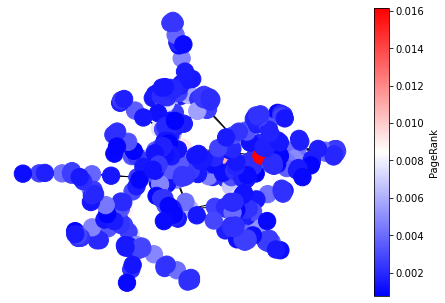

<Figure size 432x288 with 0 Axes>

In [47]:
mapa_calor(coautorias,"mapa_cPageR_coautorias","PageRank")

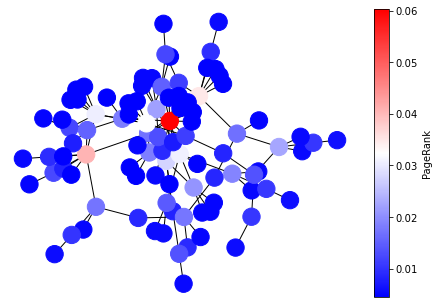

<Figure size 432x288 with 0 Axes>

In [48]:
mapa_calor(re_tweets,"mapa_cPageR_re_tweets","PageRank")

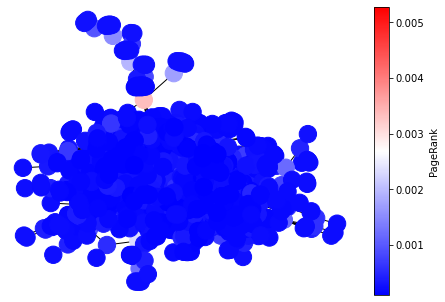

<Figure size 432x288 with 0 Axes>

In [49]:
mapa_calor(routers,"mapa_cPageR_routers","PageRank")

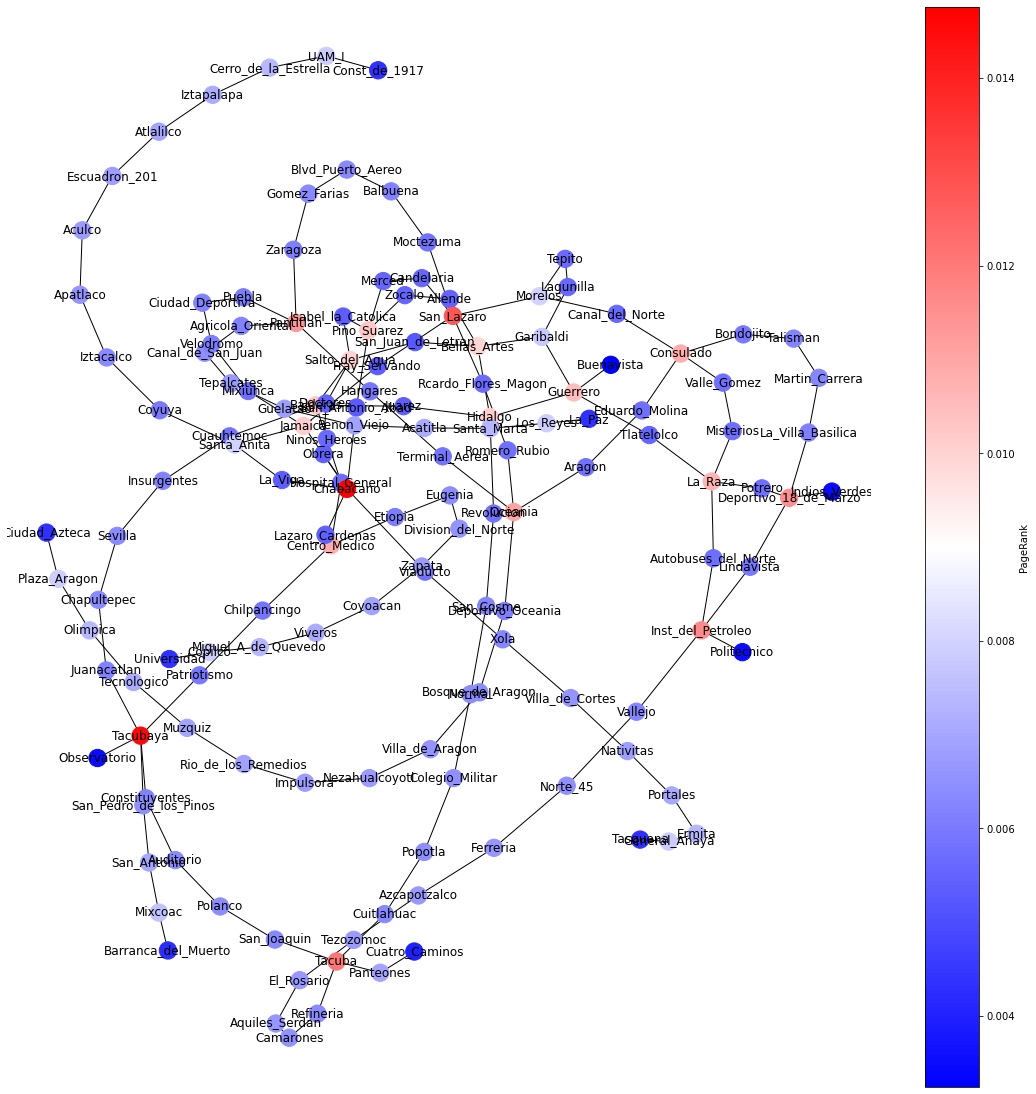

<Figure size 432x288 with 0 Axes>

In [44]:
mapa_calor(metroCDMX,"mapa_cPageR_metroCDMX","PageRank")

# Evaluación de redes sometidas a errores - Red de páginas web, red de routers, red del metro

## Simulación de errores secuenciales en la red de páginas web
Utilizando la función errores_secuenciales simula n-1 errores en la red de páginas web, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a errores

In [56]:
n1 = len(net_web.nodes())
web_num_cc1, web_tam_cg1 = errores_secuenciales(net_web.copy(), n1-1)

## ACTIVIDAD 22: Simulación de errores secuenciales en la red de routers
Utilizando la función errores_secuenciales simula n-1 errores en la red de routers, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a errores

In [50]:
n1 = len(routers.nodes())
router_num_cc1, router_tam_cg1 = errores_secuenciales(routers.copy(), n1-1)

## ACTIVIDAD 23: Simulación de errores secuenciales en la red del metro
Utilizando la función errores_secuenciales simula n-1 errores en la red del metro de la CDMX, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a errores

In [51]:
n1 = len(metroCDMX.nodes())
metro_num_cc1, metro_tam_cg1 = errores_secuenciales(metroCDMX.copy(), n1-1)

## ACTIVIDAD 24: Grafica de los componentes conectados vs. número de errores
Utilizando la función grafica_funciones, grafique la cantidad de componentes conectados vs el número de errroes para las pruebas realizadas sobre la redes de páginas web, routers y metro

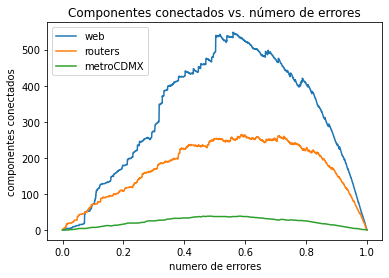

In [57]:
grafica_funciones("Componentes conectados vs. número de errores", 
                  web_num_cc1,router_num_cc1,metro_num_cc1,"web","routers","metroCDMX","numero de errores"
                  ,"componentes conectados","cc_vs_nerror_wrm")

## ACTIVIDAD 25: Grafica de la proporción del componente gigante vs. número de errores
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de errrores para las pruebas realizadas sobre la red web, routers y metro

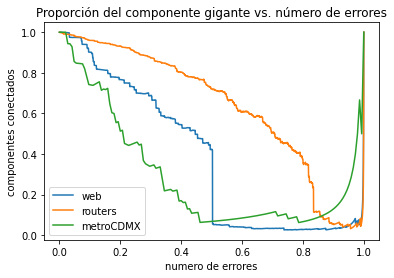

In [58]:
grafica_funciones("Proporción del componente gigante vs. número de errores", 
                  web_tam_cg1,router_tam_cg1,metro_tam_cg1,"web","routers","metroCDMX","numero de errores"
                  ,"componentes conectados","pcg_vs_nerror_wrm")

# Evaluación de redes sometidas a ataques por grado- Red de páginas web, red de routers, red del metro

## Simulación de ataques secuenciales en la red de páginas web
Utilizando la función ataques_secuenciales simula n-1 ataques por grado nodal en la red de páginas web, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [59]:
n2 = len(net_web.nodes())
web_num_cc2, web_tam_cg2 = ataques_secuenciales(net_web.copy(), n2-1, "grado")

## ACTIVIDAD 26: Simulación de ataques secuenciales en la red de routers
Utilizando la función ataques_secuenciales simula n-1 ataques por grado nodal en la red de routers, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [60]:
n2 = len(routers.nodes())
router_num_cc2, router_tam_cg2 = ataques_secuenciales(routers.copy(), n2-1,"grado")

## ACTIVIDAD 27: Simulación de ataques secuenciales en la red del metro
Utilizando la función ataques_secuenciales simula n-1 ataques por grado nodal en la red del metro de la CDMX, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [61]:
n2 = len(metroCDMX.nodes())
metro_num_cc2, metro_tam_cg2 = ataques_secuenciales(metroCDMX.copy(), n2-1, "grado")

## ACTIVIDAD 28: Grafica de los componentes conectados vs. número de ataques
Utilizando la función grafica_funciones, grafique la cantidad de componentes conectados vs el número de ataques para las pruebas realizadas sobre la redes de páginas web, routers y metro

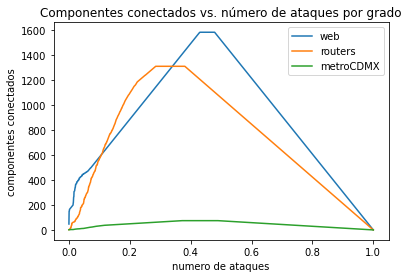

In [62]:
grafica_funciones("Componentes conectados vs. número de ataques por grado", 
                  web_num_cc2,router_num_cc2,metro_num_cc2,"web","routers","metroCDMX","numero de ataques"
                  ,"componentes conectados","cc_vs_nataques_wrm")

## ACTIVIDAD 29: Grafica de la proporción del componente gigante vs. número de ataques
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de ataques por grado para las pruebas realizadas sobre la red web, routers y metro.

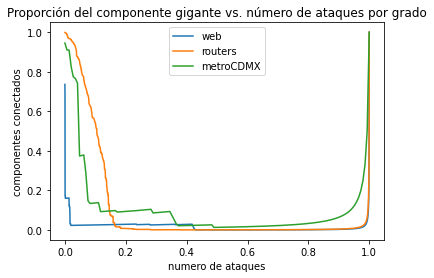

In [63]:
grafica_funciones("Proporción del componente gigante vs. número de ataques por grado", 
                  web_tam_cg2,router_tam_cg2,metro_tam_cg2,"web","routers","metroCDMX","numero de ataques"
                  ,"componentes conectados","pcg_vs_nataques_wrm")

# Evaluación de redes sometidas a ataques por intermediación- Red de coautorias, red de retweets, red del metro

## ACTIVIDAD 30: Simulación de ataques secuenciales en la red de páginas web
Utilizando la función ataques_secuenciales simula que n-1 nodos son atacados por intermediación en la red de páginas web, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [64]:
n3 = len(coautorias.nodes())
coaut_num_cc3, coaut_tam_cg3 = ataques_secuenciales(coautorias.copy(), n3-1, "intermediacion")

## ACTIVIDAD 31: Simulación de ataques secuenciales en la red de retweets
Utilizando la función ataques_secuenciales simula n-1 ataques por intermediacion en la red de retweets, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [65]:
n3 = len(re_tweets.nodes())
tweets_num_cc3, tweets_tam_cg3 = ataques_secuenciales(re_tweets.copy(), n3-1,"intermediacion")

## ACTIVIDAD 32: Simulación de ataques secuenciales en la red del metro
Utilizando la función ataques_secuenciales simula (n-1)/3 ataques por intermediacion en la red del metro de la CDMX, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [66]:
n3 = len(metroCDMX.nodes())
metro_num_cc3, metro_tam_cg3 = ataques_secuenciales(metroCDMX.copy(), int((n3-1)/3), "intermediacion")

## ACTIVIDAD 33: Grafica de los componentes conectados vs. número de ataques
Utilizando la función grafica_funciones, grafique la cantidad de componentes conectados vs el número de ataques para las pruebas realizadas sobre la redes de páginas web, routers y metro

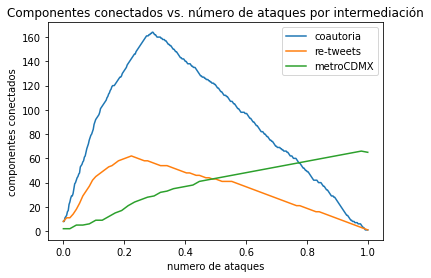

In [67]:
grafica_funciones("Componentes conectados vs. número de ataques por intermediación", 
                  coaut_num_cc3,tweets_num_cc3,metro_num_cc3,"coautoria","re-tweets","metroCDMX",
                  "numero de ataques","componentes conectados","cc_vs_nataques_crm_i")

## ACTIVIDAD 34: Grafica de la proporción del componente gigante vs. número de ataques
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de ataques por grado para las pruebas realizadas sobre la red web, routers y metro

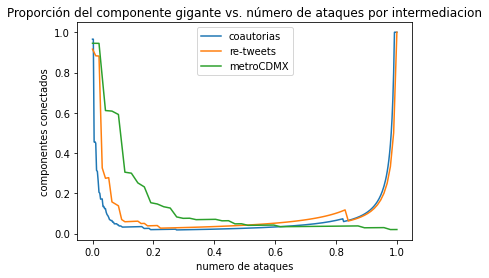

In [68]:
grafica_funciones("Proporción del componente gigante vs. número de ataques por intermediacion", 
                  coaut_tam_cg3,tweets_tam_cg3,metro_tam_cg3,"coautorias","re-tweets","metroCDMX",
                  "numero de ataques" ,"componentes conectados","pcg_vs_nataques_crm_i")

# Evaluación de redes sometidas a ataques por cercanía- Red de coautorias, red de retweets, red del metro

## ACTIVIDAD 35: Simulación de ataques secuenciales en la red de páginas web
Utilizando la función ataques_secuenciales simula que n-1 nodos son atacados por cercanía en la red de páginas web, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante.Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [73]:
n4 = len(coautorias.nodes())
coaut_num_cc4, coaut_tam_cg4 = ataques_secuenciales(coautorias.copy(), n4-1, "cercania")

## ACTIVIDAD 36: Simulación de ataques secuenciales en la red de retweets
Utilizando la función ataques_secuenciales simula n-1 ataques por cercanía en la red de retweets, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [74]:
n4 = len(re_tweets.nodes())
tweets_num_cc4, tweets_tam_cg4 = ataques_secuenciales(re_tweets.copy(), n4-1,"cercania")

## ACTIVIDAD 37: Simulación de ataques secuenciales en la red del metro
Utilizando la función ataques_secuenciales simula (n-1)/3 ataques por cercania en la red del metro de la CDMX, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [75]:
n4 = len(metroCDMX.nodes())
metro_num_cc4, metro_tam_cg4 = ataques_secuenciales(metroCDMX.copy(), int((n4-1)/3), "cercania")

## ACTIVIDAD 38: Grafica de los componentes conectados vs. número de ataques
Utilizando la función grafica_funciones, grafique la cantidad de componentes conectados vs el número de ataques para las pruebas realizadas sobre la redes de páginas web, routers y metro

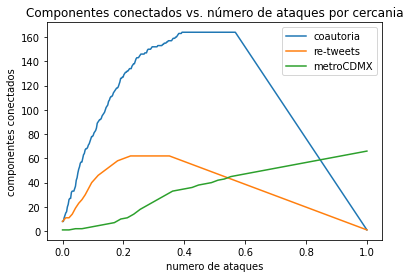

In [76]:
grafica_funciones("Componentes conectados vs. número de ataques por cercania", 
                  coaut_num_cc4,tweets_num_cc4,metro_num_cc4,"coautoria","re-tweets","metroCDMX",
                  "numero de ataques","componentes conectados","cc_vs_nataques_crm_c")

## ACTIVIDAD 39: Grafica de la proporción del componente gigante vs. número de ataques
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de ataques por grado para las pruebas realizadas sobre la red web, routers y metro

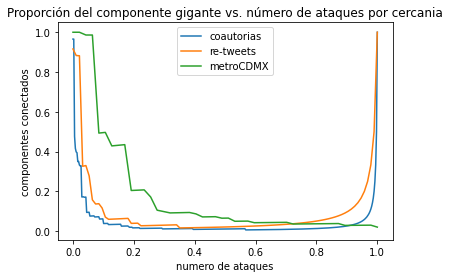

In [77]:
grafica_funciones("Proporción del componente gigante vs. número de ataques por cercania", 
                  coaut_tam_cg4,tweets_tam_cg4,metro_tam_cg4,"coautorias","re-tweets","metroCDMX",
                  "numero de ataques","componentes conectados","pcg_vs_nataques_crm_c")

# Evaluación de redes sometidas a ataques por PageRank- Red de coautorias, red de retweets, red del metro

## ACTIVIDAD 40: Simulación de ataques secuenciales en la red de páginas web
Utilizando la función ataques_secuenciales simula que n-1 nodos son atacados por PageRank en la red de páginas web, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [83]:
n5 = len(coautorias.nodes())
coaut_num_cc5, coaut_tam_cg5 = ataques_secuenciales(coautorias.copy(), n5-1, "PageRank")

## ACTIVIDAD 41: Simulación de ataques secuenciales en la red de retweets
Utilizando la función ataques_secuenciales simula n-1 ataques por PageRank en la red de retweets, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [84]:
n5 = len(re_tweets.nodes())
tweets_num_cc5, tweets_tam_cg5 = ataques_secuenciales(re_tweets.copy(), n5-1,"PageRank")

## ACTIVIDAD 42: Simulación de ataques secuenciales en la red del metro
Utilizando la función ataques_secuenciales simula n-1 ataques por PageRank en la red del metro de la CDMX, donde n es el número de nodos de la red. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante. Nota que debe hacerce una copia de la red y esa copia es la que se somete a ataques.

In [85]:
n5 = len(metroCDMX.nodes())
metro_num_cc5, metro_tam_cg5 = ataques_secuenciales(metroCDMX.copy(), n5-1, "PageRank")

## ACTIVIDAD 43: Grafica de los componentes conectados vs. número de ataques
Utilizando la función grafica_funciones, grafique la cantidad de componentes conectados vs el número de ataques para las pruebas realizadas sobre la redes de páginas web, routers y metro

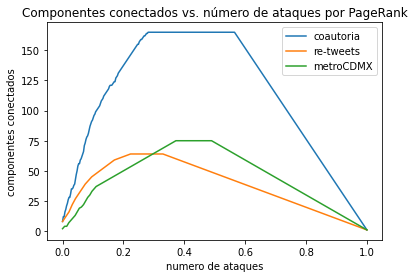

In [86]:
grafica_funciones("Componentes conectados vs. número de ataques por PageRank", 
                  coaut_num_cc5,tweets_num_cc5,metro_num_cc5,"coautoria","re-tweets","metroCDMX",
                  "numero de ataques","componentes conectados","cc_vs_nataques_crm_p")

## ACTIVIDAD 44: Grafica de la proporción del componente gigante vs. número de ataques
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de ataques por grado para las pruebas realizadas sobre la red web, routers y metro

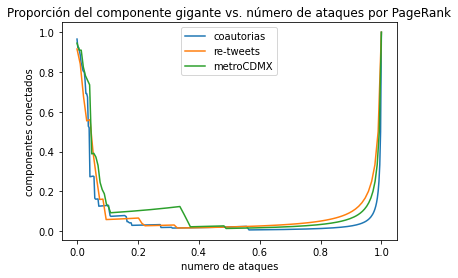

In [87]:
grafica_funciones("Proporción del componente gigante vs. número de ataques por PageRank", 
                  coaut_tam_cg5,tweets_tam_cg5,metro_tam_cg5,"coautorias","re-tweets","metroCDMX",
                  "numero de ataques","componentes conectados","pcg_vs_nataques_crm_p")